**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [8]:
# imports and magics
import numpy as np
from types import SimpleNamespace
from scipy import optimize
import matplotlib.pyplot as plt

plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [81]:
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
#par.tau = 0.0
#par.T = 0.0

# Question 3
par.kappa = 0.1

We create a class for the economy and load an instance of the class.

In [111]:
#import production economy class from python file
from exam_2024 import production_economy

#create instance of production economy
pro_econ = production_economy(par)

In [85]:
#function checking if the market clearing conditions hold
def clear_check(model,p1,p2):
    #firms
    l1,y1 = model.opt_firm(p1)
    l2,y2 = model.opt_firm(p2)

    #consumers
    l = model.opt_ls(p1,p2, 0, 0)
    c1, c2 = model.opt_cb(l, p1, p2, 0, 0)

    return l == l1+l2 and c1 == y1 and c2 == y2 

#empty list to store results
clearing = []

#loop over possible p1 and p2
for p1 in np.linspace(0.1,2.0,10):
    for p2 in np.linspace (0.1,2.0,10):
        check = clear_check(pro_econ, p1, p2)
        if check == True:
            clearing.append((p1,p2))

print(clearing)

[]


**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [87]:
pro_econ.EQ(0,0)


array([2.40681044, 5.61589104])

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [115]:
#pro_econ.clear_SWF_con((1,2), 0)
test = production_economy(par)

test.SWF_objective(0)

-0.48635921228420337

In [116]:
x0 = 0
sol = optimize.minimize(test.SWF_objective, x0 ,method='SLSQP')

/Users/mariathoisenlarsen/Desktop/Programming content /projects-2024-maria/examproject/exam_2024.py:46: RuntimeWarning: invalid value encountered in power
  return - (np.log(c1**self.alpha * c2**(1-self.alpha)) - self.nu*l**(1+self.epsilon)/(1+self.epsilon))


In [143]:
# write your answer here

# # Grid search
# taus = np.linspace(0,1,10)
# Ts = np.linspace(0,1,10)
# max = -np.inf

# for tau in taus:
#     for T in Ts:
#         SWF_econ_grid = production_economy(par, tau, T)
#         point = SWF_econ_grid.SWF_obj((tau,T))
#         if(point>max):
#             max = point




# SWF_econ = production_economy(par, 0.1, 0.1)

# # Real solver
# SWF_econ.SWF_solve()


    


    






/Users/mariathoisenlarsen/Desktop/Programming content /projects-2024-maria/examproject/exam_2024.py:50: RuntimeWarning: invalid value encountered in power
  return - (np.log(c1**self.alpha * c2**(1-self.alpha)) - self.nu*l**(1+self.epsilon)/(1+self.epsilon))


## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [3]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


We draw the noise term K times for each career and calculate the realized utility for each of those draws. Then we sum accros all the draws for each career to find the average realized utility. Since K is large, we expect the average realised utility to be close to the expected utility. 

In [62]:
#draw noise terms for each career
np.random.seed(6969)
eps_draws = np.random.normal(loc=0,scale=par.sigma,size=(par.K,par.J))

#average utility
avg_u = par.v+1/par.K*sum(eps_draws)
print(f'The average realized utility for each career is: u1: {avg_u[0]:.3f}, u2: {avg_u[1]:.3f} and u3 {avg_u[2]:.3f}')

The average realized utility for each career is: u1: 1.000, u2: 2.004 and u3 2.972


This is very close to the expected utility of each career: $\mathbb{E}\left[ u_1 \right] = 1$, $\mathbb{E}\left[ u_2 \right] = 2$ and $\mathbb{E}\left[ u_3 \right] = 3$.

Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

We start by initialising zero-arrays to store the results following the procedure laid out by point 1-3 above. To find the shares, we sum over the elements where the chosen career is 1,2 and 3 respectively to find the total number. Similarily, to find the averages we sum over the elements for every type i.

In [67]:
# initialize arrays
prior_u = np.zeros((par.N,par.J, par.K))
realized_u = np.zeros((par.N, par.J,par.K))

chosen_career = np.zeros((par.N,par.K))
prior_u_chosen_career = np.zeros((par.N,par.K))
realized_u_chosen_career = np.zeros((par.N,par.K))

#loop over different graduate types K times
for k in range(1,par.K+1):
    for i in range(1,par.N+1):
        
        # draw friends noise term and calculate prior expected utility
        friend_draws = np.random.normal(loc=0,scale=par.sigma,size=(i,par.J))
        prior_u[i-1,:,k-1] = par.v+1/i*np.sum(friend_draws, axis=0)
        
        # draw graduate's own noise term and culculate realized utility
        realized_u[i-1,:,k-1] = par.v+np.random.normal(loc=0,scale=par.sigma,size=(1,par.J))

        # find chosen career and corresponding prior expected utility and realized utility
        chosen_career[i-1,k-1] = np.argmax(prior_u[i-1,:,k-1])+1
        prior_u_chosen_career[i-1,k-1] = prior_u[i-1,int(chosen_career[i-1,k-1]-1),k-1]
        realized_u_chosen_career[i-1,k-1] = realized_u[i-1,int(chosen_career[i-1,k-1]-1),k-1]
    


In [69]:
# initialise array for shares
job_share = np.zeros((par.N,par.J))

# calculate shares
for i in range(1,par.N+1):
    job_share[i-1,0] = sum(chosen_career[i-1,:]==1)
    job_share[i-1,1] = sum(chosen_career[i-1,:]==2)
    job_share[i-1,2] = sum(chosen_career[i-1,:]==3)

job_share *= 1/par.K

# prior expected utility of chosen career
prior_chosen_avg = 1/par.K*np.sum(prior_u_chosen_career, axis=1)
realized_chosen_avg = 1/par.K*np.sum(realized_u_chosen_career, axis=1)


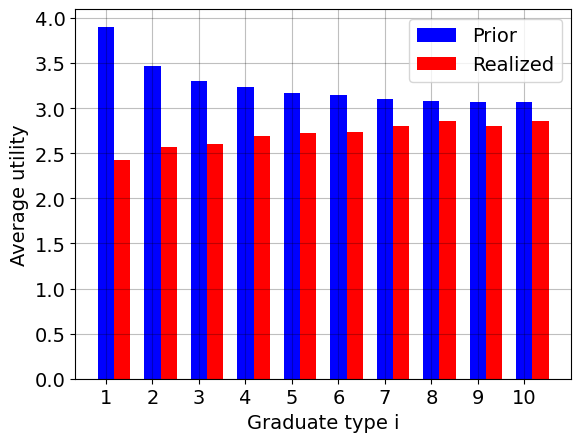

In [78]:
## this code bit was written with help from https://chatgpt.com/

# set the positions and width for the bars
index = np.arange(10) + 1
bar_width = 0.35

# create the figure and axes
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# plot the bars
bar1 = ax.bar(index, prior_chosen_avg, bar_width, label='Prior', color='blue')
bar2 = ax.bar(index + bar_width, realized_chosen_avg, bar_width,  label='Realized', color='red')

#ax.set_ylim(2.8,3.1);
ax.set_xlabel('Graduate type i')
ax.set_ylabel('Average utility')
ax.set_xticks(index)
ax.legend()

In [72]:
print(job_share)

[[0.1506 0.3012 0.5482]
 [0.0925 0.2733 0.6342]
 [0.0708 0.2507 0.6785]
 [0.0447 0.2291 0.7262]
 [0.0361 0.2011 0.7628]
 [0.0265 0.1825 0.791 ]
 [0.0169 0.1692 0.8139]
 [0.0142 0.1541 0.8317]
 [0.0096 0.1452 0.8452]
 [0.0087 0.13   0.8613]]


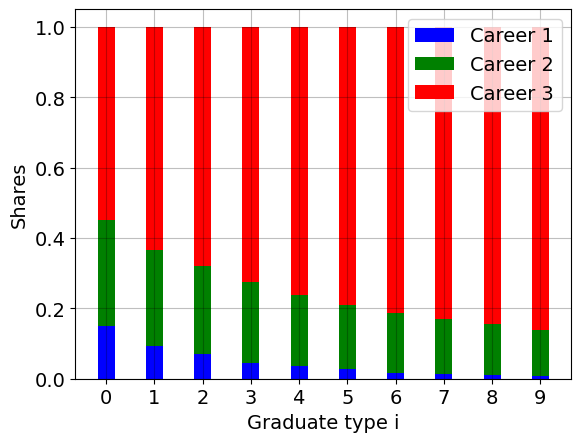

In [79]:
## this code bit was written with help from https://chatgpt.com/
# number of groups
n_groups = 10

# set the positions for the bars
index = np.arange(n_groups)
bar_width = 0.35

# Create the figure and axes
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Plot the bars
bar1 = ax.bar(index, job_share[:,0], bar_width, label='Career 1', color='blue')
bar2 = ax.bar(index, job_share [:,1], bar_width, bottom=job_share[:,0], label='Career 2', color='green')
bar3 = ax.bar(index, job_share[:,2], bar_width, bottom=job_share[:,0] + job_share[:,1], label='Career 3', color='red')

# Add labels, title, and legend
ax.set_xlabel('Graduate type i')
ax.set_ylabel('Shares')
ax.set_xticks(index)
ax.legend()


From this we can see that when the graduate has more friends in each career, they icreasinlgy choose career 3 and their expected utiltity will approximate their realized utility. This is what we would expect from the law of large numbers.

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

In [ ]:
# write your answer here




## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [ ]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

In [ ]:
# write your answer here

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [ ]:
# write your answer here

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [ ]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [ ]:
# write your answer here

**Question 4:** Repeat question 3 for all points in the set $Y$.

In [ ]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [ ]:
# write your answer here